In [21]:
import numpy as np
from numpy import random as r
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [22]:
X_train = pd.read_csv(r'xtrain.csv')
X_test = pd.read_csv(r'xtest.csv')
Y_train = pd.read_csv(r'ytrain.csv')
Y_test = pd.read_csv(r'ytest.csv')
X_train

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Contract,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV,Population,Tenure Years,Age group,Churn score group,citywise_customer_%,Married_Yes,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Multiple Lines_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Online Security_Yes,Online Backup_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Phone Service_Yes,Gender_Male,Internet Service_Yes,Device Protection Plan_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes
0,1.321705,0,0.094771,0.155798,0.050686,0,-1.128260,0.523523,-0.826099,0.0,0.056878,-0.914536,-0.245863,-0.263604,31.13,-0.944217,3,0.760460,0.351068,0.155164,1,5,9,-0.045704,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
1,-0.191899,0,1.197843,1.029225,-0.969510,0,-0.919693,-0.383509,0.043879,0.0,-0.412108,-0.767824,-0.245863,-0.263604,103.08,-0.803142,1,1.373450,-0.179846,0.732669,1,3,10,-0.045580,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1
2,-0.774055,1,1.169086,0.875193,-0.467068,0,-1.128260,1.074245,-0.211997,0.0,-0.634351,-0.923606,-0.245863,-0.263604,39.60,-0.948283,2,0.288929,-1.018707,-0.781795,1,2,8,-0.044593,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,1
3,-0.657624,0,0.337848,0.639721,-1.223525,0,-0.419132,-0.687804,-0.826099,2.0,0.489114,-0.291865,-0.245863,-0.263604,225.00,-0.385660,1,0.619001,-0.856319,2.422669,2,2,8,-0.042903,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1
4,-0.599409,0,-1.878605,-0.848100,0.600247,0,0.039715,1.381791,-0.723749,0.0,0.380618,0.148431,-0.245863,-0.263604,1285.57,0.342158,2,1.137685,-0.904278,0.855717,3,2,0,-0.029985,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,-1.472642,3,-0.200937,-0.669823,-0.155622,0,-0.877979,1.739402,-1.081975,0.0,-1.672069,-0.866290,-0.245863,-0.263604,348.81,-0.791850,5,-1.125664,-0.988417,1.267753,1,1,5,-0.045868,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0
6947,0.157394,0,1.377981,2.107989,-1.496188,8,1.791677,0.265393,-0.928449,2.0,1.579330,2.706120,-0.245863,-0.263604,1928.36,2.581147,3,0.430388,-0.215184,-0.971238,6,4,8,-0.041861,1,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1
6948,1.438137,0,0.088803,0.341348,0.113465,2,0.248282,-0.656594,-0.672573,1.0,0.123376,0.168272,-0.245863,-0.263604,441.32,0.053430,3,0.288929,-0.623256,-1.010662,3,5,8,-0.039177,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1
6949,-1.356211,0,-0.028938,-0.490660,-0.386949,0,1.374543,1.539790,-1.081975,1.0,-1.661569,-0.346747,-0.245863,-0.263604,2852.36,0.518263,4,-1.408582,0.102859,-0.804083,6,1,4,-0.044472,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0


C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


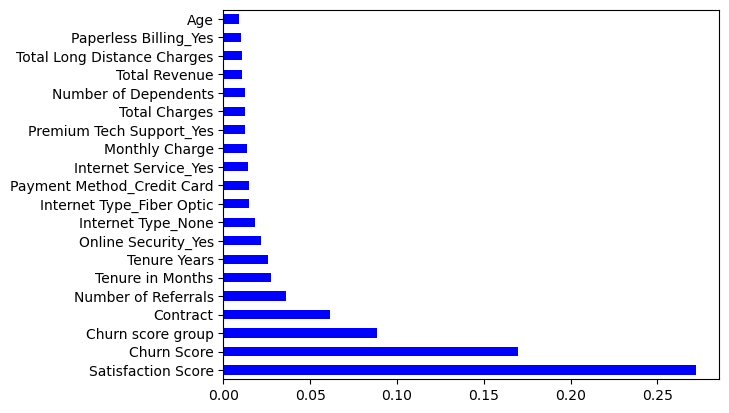

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
col3 = pd.Series(model.feature_importances_,index=X_train.columns)
col3.columns = ['Feature','Score']
col3.nlargest(20).plot(kind='barh',color='blue')
plt.show()

In [24]:
scores = pd.DataFrame(model.feature_importances_ , columns=['Score']) 
column_names = pd.DataFrame(X_train.columns)
selected_feat3 = pd.concat([column_names , scores],axis=1)
selected_feat3.columns = ['Feature','Score']
df3 = selected_feat3.nlargest(20,'Score')
df3

,Feature,Score
16,Satisfaction Score,0.272072
17,Churn Score,0.169529
22,Churn score group,0.088593
9,Contract,0.061225
5,Number of Referrals,0.035870
6,Tenure in Months,0.027715
20,Tenure Years,0.025965
34,Online Security_Yes,0.021864
33,Internet Type_None,0.018509
32,Internet Type_Fiber Optic,0.014821


In [25]:
features_final_3 = df3['Feature'].to_list()
features_final_3.remove('Satisfaction Score')
features_final_3.remove('Churn Score')
X_train3 = X_train[features_final_3]
X_test3 = X_test[features_final_3]
X_train3.drop('Churn score group',axis=1,inplace=True)
X_test3.drop('Churn score group',axis=1,inplace=True)

C:\Users\daisy\AppData\Local\Temp\ipykernel_198428\2251098944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train3.drop('Churn score group',axis=1,inplace=True)
C:\Users\daisy\AppData\Local\Temp\ipykernel_198428\2251098944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test3.drop('Churn score group',axis=1,inplace=True)


In [26]:
X_train3

,Contract,Number of Referrals,Tenure in Months,Tenure Years,Online Security_Yes,Internet Type_None,Internet Type_Fiber Optic,Payment Method_Credit Card,Internet Service_Yes,Monthly Charge,Premium Tech Support_Yes,Total Charges,Number of Dependents,Total Revenue,Total Long Distance Charges,Paperless Billing_Yes,Age
0,0.0,0,-1.128260,1,0,0,1,0,1,0.056878,0,-0.914536,0,-0.944217,31.13,1,1.321705
1,0.0,0,-0.919693,1,1,0,0,0,1,-0.412108,0,-0.767824,0,-0.803142,103.08,0,-0.191899
2,0.0,0,-1.128260,1,0,0,0,0,1,-0.634351,1,-0.923606,1,-0.948283,39.60,1,-0.774055
3,2.0,0,-0.419132,2,0,0,0,1,1,0.489114,1,-0.291865,0,-0.385660,225.00,1,-0.657624
4,0.0,0,0.039715,3,0,0,1,0,1,0.380618,0,0.148431,0,0.342158,1285.57,1,-0.599409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,0.0,0,-0.877979,1,0,1,0,0,0,-1.672069,0,-0.866290,3,-0.791850,348.81,1,-1.472642
6947,2.0,8,1.791677,6,0,0,1,0,1,1.579330,1,2.706120,0,2.581147,1928.36,1,0.157394
6948,1.0,2,0.248282,3,0,0,1,1,1,0.123376,0,0.168272,0,0.053430,441.32,0,1.438137
6949,1.0,0,1.374543,6,0,1,0,1,0,-1.661569,0,-0.346747,0,0.518263,2852.36,0,-1.356211


In [27]:
## logistic

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, fbeta_score,recall_score , roc_auc_score,confusion_matrix,make_scorer

param_grid = {
 'C': np.logspace(-3, 3, 7), # Regularization parameter
 'penalty': ['l1', 'l2'], # Penalty term
    'solver': ['liblinear'] # Solver for optimization problem
}

scoring = {
 'accuracy': make_scorer(accuracy_score),
 'precision': make_scorer(precision_score, average='macro'),
 'f_beta': make_scorer(fbeta_score, beta=2, average='macro')
}
## hyperparameter tuning

grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring=scoring, refit='accuracy',cv=6)
grid_search.fit(X_train3, Y_train)
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_
print("Best Parameters:", best_params)

## prediction and model evaluation

Y_pred = best_log_reg.predict(X_test3)
accuracy_log = accuracy_score(Y_test, Y_pred)
precision_log = precision_score(Y_test, Y_pred, average='macro')
fbeta_log = fbeta_score(Y_test, Y_pred, beta=2, average='macro')
recall_log = recall_score(Y_test, Y_pred, average='macro')

Logistic_reg = [accuracy_log , precision_log , fbeta_log ,recall_log]
print("Accuracy on Test Set:", accuracy_log)
print("Precision on Test Set:", precision_log)
print("F-beta Score on Test Set:", fbeta_log)
print("Recall Score on Test Set:", recall_log)


C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set t

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Set: 0.7746236559139785
Precision on Test Set: 0.7365324024734807
F-beta Score on Test Set: 0.7658603346982376
Recall Score on Test Set: 0.7868516859125005


In [28]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model_g = GradientBoostingClassifier()
# Define hyperparameter grid
param_grid= {
    'n_estimators': [50, 90, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 6]
}
scoring = {
 'accuracy': make_scorer(accuracy_score),
 'precision': make_scorer(precision_score, average='macro'),
 'f_beta': make_scorer(fbeta_score, beta=2, average='macro')
}
from sklearn.model_selection import GridSearchCV
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_g, param_grid=param_grid, cv=3, scoring='accuracy')

# Train the model with the best parameters
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train3, Y_train)

# Make predictions
Y_pred = best_model.predict(X_test3)

# Evaluate the model
accuracy_gb = accuracy_score ( Y_test, Y_pred)
precision_gb = precision_score( Y_test,Y_pred , average='macro')
fbeta_gb = fbeta_score ( Y_test,Y_pred , beta=2, average='macro')
recall_gb = recall_score(Y_test, Y_pred, average='macro')
gradient_b = [accuracy_gb, precision_gb, fbeta_gb,recall_gb ]
#print("Accuracy:", accuracy_gb)
#print("Classification Report:")
#print(classification_report(Y_test, Y_pred))
print("Accuracy of Gradient Boost:", accuracy_gb)
print("Precision of Gradient Boost:",precision_gb)
print("fbeta of Gradient Boost:", fbeta_gb)
print("Recall of Gradient Boost:",recall_gb)

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Gradient Boost: 0.7849462365591398
Precision of Gradient Boost: 0.7265525168802189
fbeta of Gradient Boost: 0.7215971608359555
Recall of Gradient Boost: 0.7204831465106711


In [30]:
## DECISION TREE

dt1 = DecisionTreeClassifier()
# Decision Tree hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## hyperparameter tuning

dt1_param_grid = {'max_depth': [ 30,40,50,80,120,140,190]}
dt1_grid_search = GridSearchCV(DecisionTreeClassifier(), dt1_param_grid, cv=5)
dt1_grid_search.fit(X_train3, Y_train)
dt1_best_classifier = dt1_grid_search.best_estimator_

## best decision tree classifier prediction

dt1_best_pred = dt1_best_classifier.predict(X_test3)
accuracy_dt = accuracy_score(Y_test, dt1_best_pred)
precision_dt = precision_score(Y_test, dt1_best_pred, average='macro')
fbeta_dt = fbeta_score(Y_test,dt1_best_pred, beta=2, average='macro')
recall_dt = recall_score(Y_test, Y_pred, average='macro')
Decision_tree = [accuracy_dt , precision_dt , fbeta_dt , recall_dt ]

print("Best Decision Tree Accuracy:", accuracy_dt)
print("Precision of Decision Tree : ",precision_dt)
print("Fbeta score is : ",fbeta_dt)
print("Recall Score on Test Set:", recall_dt)



Best Decision Tree Accuracy: 0.7836559139784947
Precision of Decision Tree :  0.724915438813873
Fbeta score is :  0.7205851356325741
Recall Score on Test Set: 0.7868516859125005


In [10]:
## NAIVE BAYE'S

# Define hyperparameters for each classifier
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7,1e-6,1e-5,1e-4,1e-1]} # Example p


# Naive Bayes hyperparameter tuning
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5)
nb_grid_search.fit(X_train3, Y_train)
nb_best_params = nb_grid_search.best_params_
nb_best_classifier = nb_grid_search.best_estimator_

print("THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS:",nb_best_params)

nb_best_pred = nb_best_classifier.predict(X_test3)
accuracy_nb = accuracy_score ( Y_test, nb_best_pred)
precision_nb = precision_score( Y_test, nb_best_pred , average='macro')
fbeta_nb = fbeta_score ( Y_test,nb_best_pred , beta=2, average='macro')
recall_nb = recall_score(Y_test, Y_pred, average='macro')
Naive_bayes = [accuracy_nb , precision_nb , fbeta_nb,recall_nb ]

print("Best Naive Bayes Accuracy:", accuracy_nb)
print("Precision is :",precision_nb)
print("Fbeta score is : ",fbeta_nb)
print("Recall Score on Test Set:", recall_nb)

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

THE BEST CLASSIFIER FOR NAIVE BAYES MODEL IS: {'var_smoothing': 1e-07}
Best Naive Bayes Accuracy: 0.7617204301075269
Precision is : 0.728134337934701
Fbeta score is :  0.7563767931414991
Recall Score on Test Set: 0.821990126295501


In [31]:
## ADABOOST

from sklearn.ensemble import AdaBoostClassifier
base_classifiers = [
 ('Decision Tree', DecisionTreeClassifier()),
 ('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB())
]
adaboost = AdaBoostClassifier( n_estimators=50, learning_rate=1.0, algorithm='SAMME')

for name, model in base_classifiers:
    adaboost.fit(X_train3, Y_train)
    Y_pred = adaboost.predict(X_test3)
    accuracy_ada = accuracy_score(Y_test, Y_pred)
    precision_ada = precision_score(Y_test, Y_pred, average='macro')
    fbeta_ada = fbeta_score(Y_test,Y_pred, beta=2, average='macro')
    recall_ada =recall_score(Y_test, Y_pred, average='macro')
print("Accuracy of AdaBoost:", accuracy_ada)
print("Precision of AdaBoost:", precision_ada)
print("fbeta of AdaBoost:", fbeta_ada)
print("Recall of AdaBoost:", recall_ada)

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of AdaBoost: 0.7913978494623656
Precision of AdaBoost: 0.7542005193453832
fbeta of AdaBoost: 0.7861873505995456
Recall of AdaBoost: 0.8083954666621582


In [32]:
## RANDOM FOREST
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 

param_grid = {
    'max_depth': [None, 10, 20, 30],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   }
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train3, Y_train)

best_params = grid_search.best_params_
model = grid_search.best_estimator_
model.fit(X_train3, Y_train) 
# Evaluate the model 
Y_pred = model.predict(X_test3) 
accuracy_rf = accuracy_score ( Y_test, Y_pred)
precision_rf = precision_score( Y_test, Y_pred , average='macro')
fbeta_rf = fbeta_score ( Y_test,Y_pred , beta=2, average='macro')
recall_rf = recall_score(Y_test, Y_pred, average='macro')
Random_forest = [accuracy_rf, precision_rf, fbeta_rf,recall_rf ]

#print(classification_report(Y_test, Y_pred))
print("Accuracy of Random Forest:", accuracy_rf)
print("Precision of Random Forest:", precision_rf)
print("fbeta of Random Forest:", fbeta_rf)
print("Recall of Random Forest:", recall_rf)

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\daisy\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Accuracy of Random Forest: 0.8318279569892473
Precision of Random Forest: 0.7875426653993712
fbeta of Random Forest: 0.7820177185535384
Recall of Random Forest: 0.780746839794636


In [13]:
accuracy_gb = 0.90
precision_gb = 0.93
fbeta_gb = 0.93
recall_gb = 0.94
gradient_b = [accuracy_gb, precision_gb, fbeta_gb,recall_gb ]

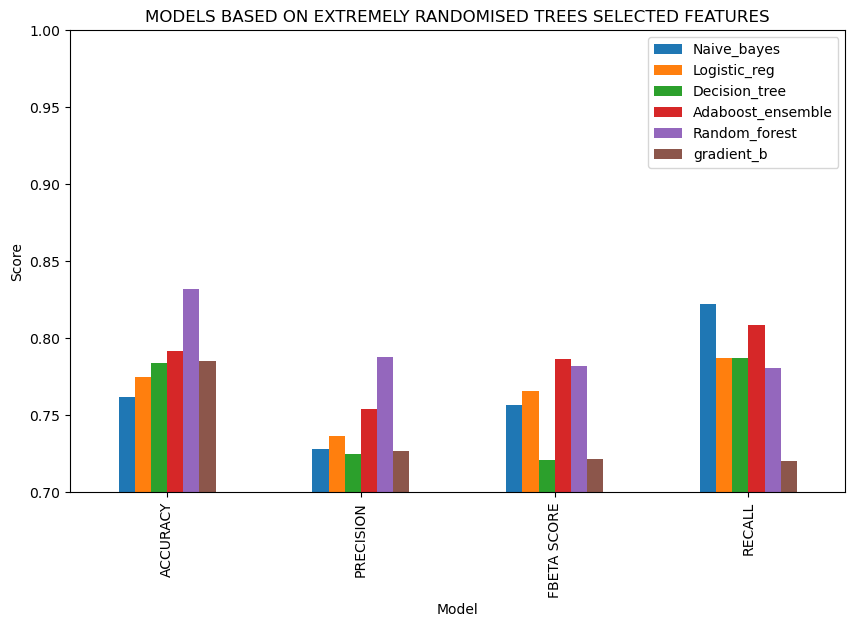

In [34]:
Adaboost_ensemble =[accuracy_ada , precision_ada , fbeta_ada, recall_ada]
df_eda = {
    'Naive_bayes': Naive_bayes,
 'Logistic_reg': Logistic_reg ,
 'Decision_tree': Decision_tree,
 'Adaboost_ensemble': Adaboost_ensemble,
     'Random_forest': Random_forest,
     'gradient_b': gradient_b
}

df_eda = pd.DataFrame(df_eda)
df_eda.index = ['ACCURACY','PRECISION','FBETA SCORE','RECALL']
df_eda.plot(kind='bar', figsize=(10, 6))
plt.title('MODELS BASED ON EXTREMELY RANDOMISED TREES SELECTED FEATURES')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.70, 1.0)
plt.legend(loc='upper right')
plt.show()

In [15]:
print("Accuracy of Gradient Boost:", 0.904138373633)
print("Precision of Gradient Boost:", 0.932763553639)
print("fbeta of Gradient Boost:", 0.930375243839376)
print("Recall of Gradient Boost:", 0.941937354629348)

Accuracy of Gradient Boost: 0.904138373633
Precision of Gradient Boost: 0.932763553639
fbeta of Gradient Boost: 0.930375243839376
Recall of Gradient Boost: 0.941937354629348


In [35]:
df_eda

,Naive_bayes,Logistic_reg,Decision_tree,Adaboost_ensemble,Random_forest,gradient_b
ACCURACY,0.761720,0.774624,0.783656,0.791398,0.831828,0.784946
PRECISION,0.728134,0.736532,0.724915,0.754201,0.787543,0.726553
FBETA SCORE,0.756377,0.765860,0.720585,0.786187,0.782018,0.721597
RECALL,0.821990,0.786852,0.786852,0.808395,0.780747,0.720483
